In [1]:
import os, sys
import matplotlib
import matplotlib.pyplot as plt
print(os.getpid())

1844


In [2]:
sys.path.append(r'../..')
from ChromAn import src
from ChromAn.src.file_io.dax_process import DaxProcesser
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [3]:
image_folder = r'E:\Data\Tests'
#image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230630-4T1cell_methanol\H0M1'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
print(image_basenames)

E:\Data\Tests
['zscan_748_637_545_477_405_s13_n1000_5Hz_0001.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0002.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0003.dax']


In [4]:
image_filename = os.path.join(image_folder, image_basenames[-1])
print(image_filename)
# load image
daxp = DaxProcesser(image_filename,
                    CorrectionFolder=r'\\wi-bigdata\weissman_imaging\puzheng\Corrections' )
daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

E:\Data\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0003.dax
Initialize DaxProcesser for file:E:\Data\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0003.dax
- New save file: E:\Data\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0003_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  13 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 0.399s.


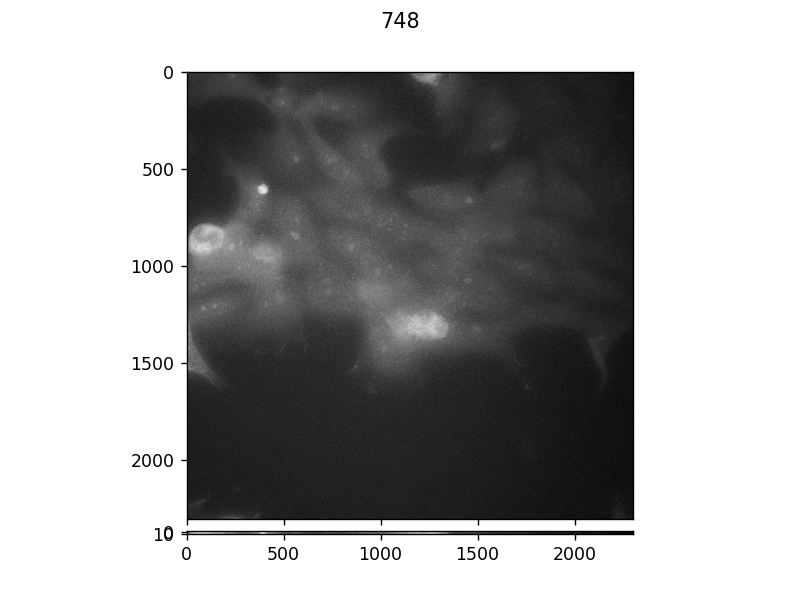

In [7]:
%matplotlib notebook
f = plt.figure(dpi=125)
imshow_mark_3d([getattr(daxp, f"im_{_ch}") for _ch in daxp.channels][1:], 
                fig=f,
                image_names=daxp.channels, 
                min_max_default=[2000,50000],
                )